In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_dir='/content/drive/MyDrive/PlantDisease/Data'
categories=os.listdir(data_dir)

# Load images and Labels
images = []
labels = []

for category in categories:
    print(category)
    folder_path = os.path.join(data_dir, category)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
           img = cv2.resize(img, (64, 64)) #Resize to uniform size
           images.append(img)
           labels.append(category)

#Convert images and labels to numpy arrays
images = np.array(images)

Tomato___healthy
Tomato___Early_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Late_blight
Tomato___Bacterial_spot


In [ ]:
#Convert to numpy arrays
x = np.array(images)
y = np.array(labels)

print("Labels:", np.unique(y))
print("Data Shape:", x.shape)

Labels: ['Tomato___Early_blight' 'Tomato___Late_blight' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']
Data Shape: (9962, 64, 64, 3)


Class Distribution
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1961
Tomato___healthy                          1926
Tomato___Late_blight                      1851
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1800
Tomato___Early_blight                      597
Name: count, dtype: int64


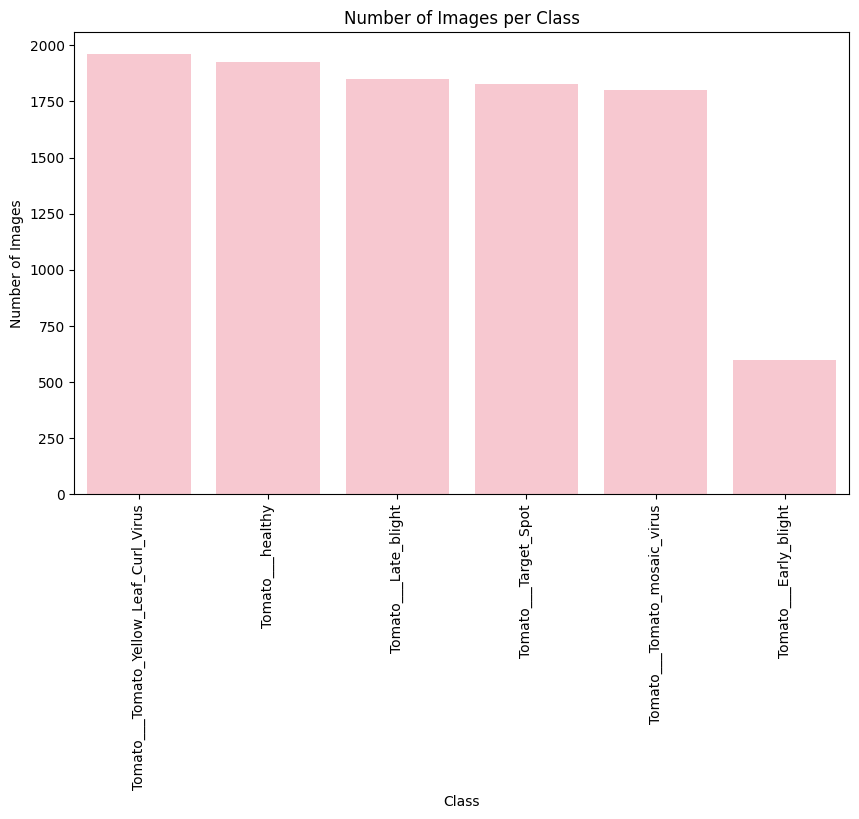

In [ ]:
class_counts = pd.Series(y).value_counts()
print("Class Distribution")
print(class_counts)

#plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, color='pink')
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
#remove corrupted images()
valid_images = []
valid_labels = []

for img, label in zip(x,y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x = np.array(valid_images)
y = np.array(valid_labels)

print("Cleaned Data Shape:", x.shape)

Cleaned Data Shape: (9962, 64, 64, 3)


In [ ]:
#Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#save class names for later use
class_names = le.classes_
class_names

array(['Tomato___Early_blight', 'Tomato___Late_blight',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

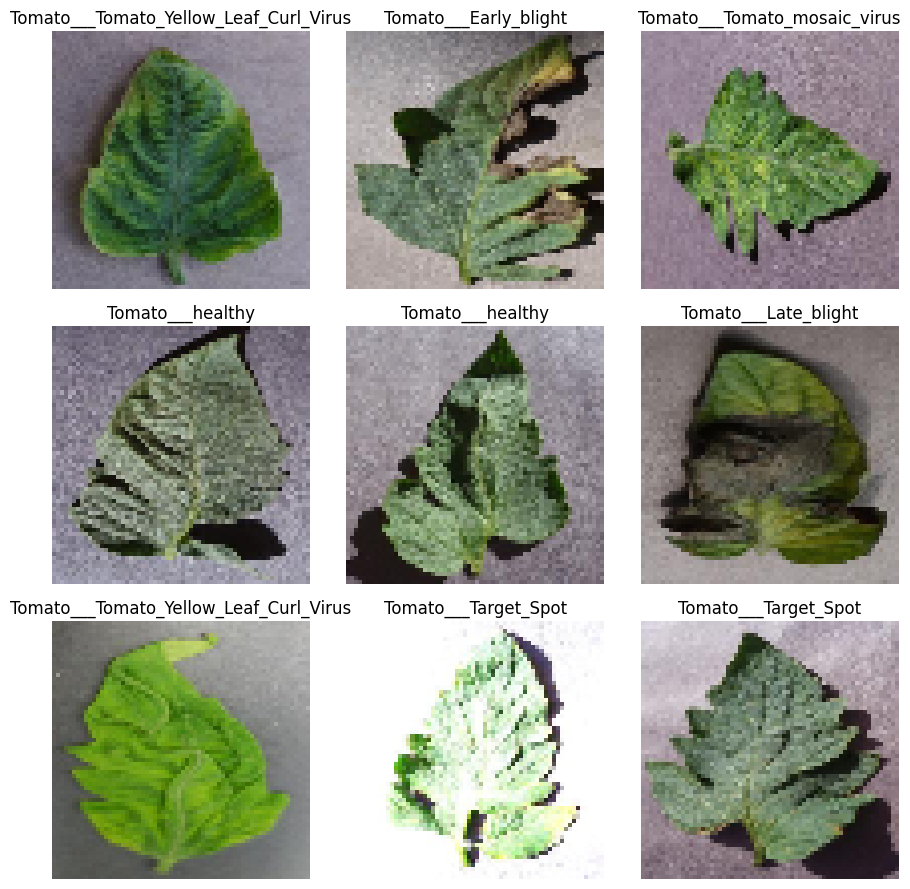

In [ ]:
import random

plt.figure(figsize=(9,9))
for i in range(9):
  idx = random.randint(0, len(x))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(x[idx], cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def extract_color_histogram(image, bins=(8,8,8)):

  images = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([images], [0,1,2], None, bins, [0,256,0,256,0,256])
  hist = cv2.normalize(hist, hist).flatten()
  return hist

hist_features = [extract_color_histogram(img) for img in x]
x_features = np.array(hist_features)

In [ ]:
x_features.shape

(9962, 512)

In [ ]:
# Choose model
model = SVC(kernel='rbf', C=10, gamma='scale')

In [ ]:
#Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_encoded, test_size=0.2, random_state=42)

#Train model
model.fit(x_train, y_train)

#Predict
y_pred = model.predict(x_test)

Accuracy: 0.9799297541394882
F1 Score: 0.9800067326118618


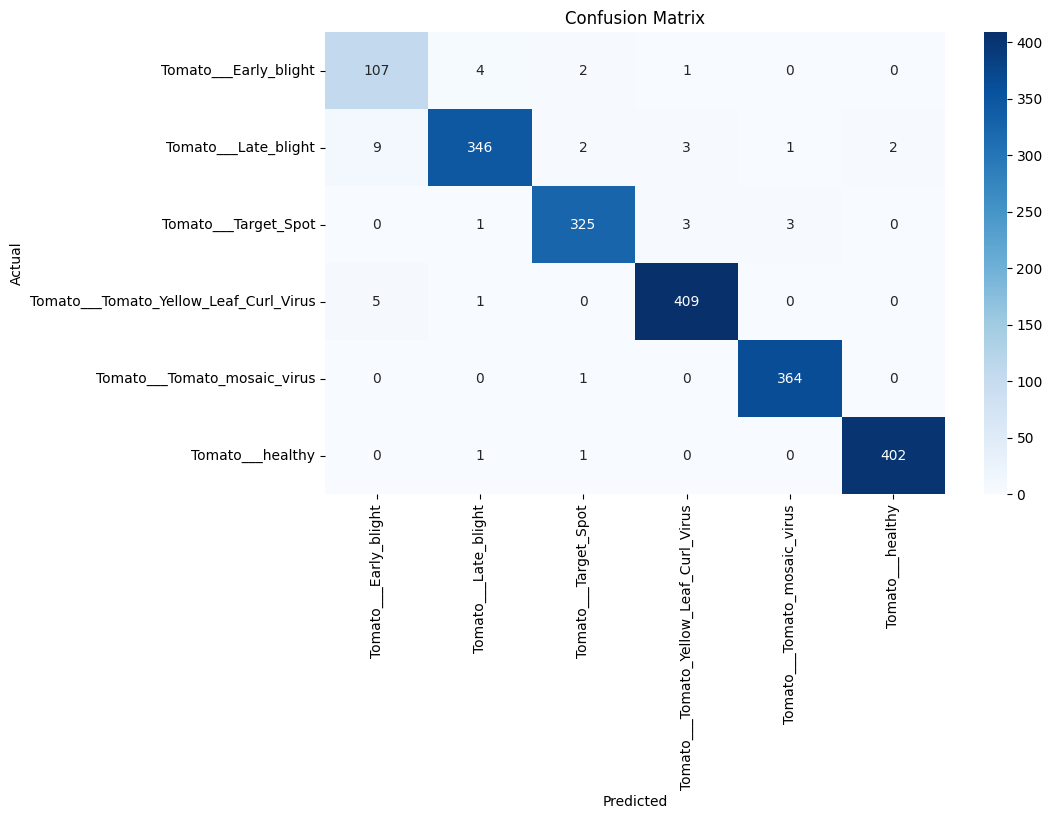

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#f1_score
f1= f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#plot confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
                                        precision    recall  f1-score   support

                 Tomato___Early_blight       0.88      0.94      0.91       114
                  Tomato___Late_blight       0.98      0.95      0.97       363
                  Tomato___Target_Spot       0.98      0.98      0.98       332
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.99      0.98       415
          Tomato___Tomato_mosaic_virus       0.99      1.00      0.99       365
                      Tomato___healthy       1.00      1.00      1.00       404

                              accuracy                           0.98      1993
                             macro avg       0.97      0.97      0.97      1993
                          weighted avg       0.98      0.98      0.98      1993

